# Using a CellTypist model for automatic cell annotation

This is a simplified version of the [CellTypist general tutorial] https://celltypist.readthedocs.io/en/latest/notebook/celltypist_tutorial.html

## Getting started 

Install the celltypist python package

In [1]:
!pip install celltypist scanpy

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import celltypist
from celltypist import models

In [2]:
import matplotlib.pyplot as mpl

## Load model

We provide a pre-trained CellTypist model for cell type prediction from all the mouse intestinal cells

In [3]:
models.models_description()

👉 Detailed model information can be found at `https://www.celltypist.org/models`


,model,description
0,Immune_All_Low.pkl,immune sub-populations combined from 20 tissue...
1,Immune_All_High.pkl,immune populations combined from 20 tissues of...
2,Adult_CynomolgusMacaque_Hippocampus.pkl,cell types from the hippocampus of adult cynom...
3,Adult_Human_PancreaticIslet.pkl,cell types from pancreatic islets of healthy a...
4,Adult_Mouse_Gut.pkl,cell types in the adult mouse gut combined fro...
5,Adult_Mouse_OlfactoryBulb.pkl,cell types from the olfactory bulb of adult mice
6,Adult_Pig_Hippocampus.pkl,cell types from the adult pig hippocampus
7,Adult_RhesusMacaque_Hippocampus.pkl,cell types from the hippocampus of adult rhesu...
8,Autopsy_COVID19_Lung.pkl,cell types from the lungs of 16 SARS-CoV-2 inf...
9,COVID19_HumanChallenge_Blood.pkl,detailed blood cell states from 16 individuals...


In [4]:
model= models.Model.load(model = 'Adult_Mouse_Gut.pkl')

In [5]:
model.description

{'date': '2022-08-08 05:26:50.850176',
 'details': 'cell types in the adult mouse gut combined from eight datasets',
 'url': 'https://celltypist.cog.sanger.ac.uk/models/Mouse_Gut_Casado/v2/Adult_Mouse_Gut.pkl',
 'source': 'https://doi.org/10.1101/2022.08.26.505428',
 'version': 'v2',
 'number_celltypes': 126}

We can have a look at the cell types included in this model

In [6]:
model.cell_types

array(['Activated CD4+ T cell', 'B cell', 'Basophil', 'CD4',
       'CD8+ T cell', 'Ccr7 DC', 'Cd11c Mac', 'Cd206 Mac', 'Clec4e mono',
       'D.cells', 'DC', 'DC (CD103+ CD11+b)', 'DC (CD103+ CD11-b)',
       'DC (CD103- C2)', 'EC.Reg4', 'EP', 'EarlyGC_1', 'EarlyGC_2',
       'Endocrine', 'Endothelial cell', 'Enterocyte', 'Enterocyte.1',
       'Enterocyte.2', 'Enterocyte.Immature.Distal',
       'Enterocyte.Immature.Proximal', 'Enterocyte.Mature.Distal',
       'Enterocyte.Mature.Proximal', 'Enterocyte.Progenitor',
       'Enterocyte.Progenitor.Early', 'Enterocyte.Progenitor.Late',
       'Enterocyte.dist', 'Enterocyte.prox', 'Enteroendocrine',
       'Epithelial', 'Epithelial cell C1', 'Epithelial cell C2',
       'Fibroblast', 'GC B cell (DZ)', 'GC B cell (LZ)', 'Glia_1',
       'Glia_2', 'Glia_3', 'Goblet', 'ILC1', 'ILC2', 'ILC3', 'ISC-I',
       'ISC-II', 'ISC-III', 'Inflammatory Monocytes', 'K.cells',
       'LTi cell', 'Ly6c2 Mono', 'Lymphatic endothelial-like cell',
       'M.

## Load query dataset


In [7]:
adata = sc.read_h5ad('/nfs/team205/rb29/mice_gutTCRtg_project/data/h5ad_objects/mice-gut.TCRtg/latest/mice4samples_afterQC.h5ad')

The expression matrix `query_adata.X` needs to be pre-processed as log1p normalised expression to 10,000 counts per cell.

In [8]:
#sc.pp.normalize_per_cell(query_adata, counts_per_cell_after=1e4)
#sc.pp.log1p(query_adata)

## Add manually curated annotations:

In [9]:
annot=pd.read_csv("Meta_Final_annotation_lineage.csv",index_col=0)

In [10]:
annot

,final_annotation,lineage_new
AAACCTGAGCCCAATT-1-0,GC.BC_LZ-resting,B-PCs
AAACCTGAGCGTTGCC-1-0,Lymph.DC.Sirpa+,Myeloid
AAACCTGAGGTGATTA-1-0,PCs.CD19-IgM+.2,B-PCs
AAACCTGCAACGATGG-1-0,cTregs,ILCs-T.cells
AAACCTGCATGGTTGT-1-0,PCs.CD19+IgM+,B-PCs
...,...,...
TTTGTCAAGGCAATTA-1-3,Endothelial.cells,Endothelial
TTTGTCACATGACGGA-1-3,Mac.Cd206+,Myeloid
TTTGTCAGTCAATGTC-1-3,Fibroblast_Adamdec1+Pdgfra_low,Mesenchymal
TTTGTCATCAACACCA-1-3,Endothelial.cells,Endothelial


In [11]:
adata.obs = adata.obs.join(annot)

In [12]:
adata

AnnData object with n_obs × n_vars = 10831 × 19330
    obs: 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins', 'IR_VDJ_1_junction_ins', 'IR_VDJ_2_junction_ins', 'has_ir', 'multi_chain', 'sample', 'location', 'batch', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'predicted_doublets', 'n_genes

## Predict cell identity
Let's make sure that the `query_adata.var_names` corresponds to the features used to train the model.

In [13]:
model.features

array(['0610005C13Rik', '0610009B22Rik', '0610012G03Rik', ..., 'mt-Rnr1',
       'mt-Rnr2', 'mt-Tc'], dtype=object)

In [16]:
adata.var_names

Index(['Sox17', 'Mrpl15', 'Lypla1', 'Tcea1', 'Rgs20', 'Atp6v1h', 'Rb1cc1',
       '4732440D04Rik', 'St18', 'Pcmtd1',
       ...
       'Csprs', 'AC132444.6', 'Vamp7', 'Tmlhe', 'Ccl21c', 'CR974586.2',
       'CR974586.4', 'Ccl21a.1', 'CAAA01147332.1', 'AC149090.1'],
      dtype='object', length=19330)

We can use default settings to predict cell identity independently for each cell.

In [17]:
predictions = celltypist.annotate(adata, model = model, majority_voting = True)

🔬 Input data has 10831 cells and 19330 genes
🔗 Matching reference genes in the model
🧬 7193 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


In [18]:
adata = predictions.to_adata()

In [20]:
n_cells = adata.obs['predicted_labels'].value_counts()
n_cells[0:30]

Plasma cell               1549
DC                        1376
EarlyGC_2                  824
Fibroblast                 726
CD8+ T cell                690
Resting CD4+ T cells       641
CD4                        530
EarlyGC_1                  524
B cell                     373
Naive B cells              361
Activated CD4+ T cell      334
Cd206 Mac                  284
Cd11c Mac                  238
Resting B cell             222
Ccr7 DC                    219
Inflammatory Monocytes     190
LTi cell                   185
Stromal cell (DN)          183
pDC                        146
DC (CD103+ CD11-b)         116
capillary 2                114
Macrophage (M2)             85
Neutrophil                  77
capillary 1                 76
eMBC                        73
lymphatic                   67
ILC3                        61
ILC2                        51
artery                      49
DC (CD103+ CD11+b)          40
Name: predicted_labels, dtype: int64

In [21]:
adata.obs

,IR_VJ_1_locus,IR_VJ_2_locus,IR_VDJ_1_locus,IR_VDJ_2_locus,IR_VJ_1_cdr3,IR_VJ_2_cdr3,IR_VDJ_1_cdr3,IR_VDJ_2_cdr3,IR_VJ_1_cdr3_nt,IR_VJ_2_cdr3_nt,...,phase,Integrated_annotation,cell_type,cell_lineage,final_annotation,lineage_new,predicted_labels,over_clustering,majority_voting,conf_score
AAACCTGAGCCCAATT-1-0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,...,G1,Naive-BCs,Naïve B cells,B-PCs,GC.BC_LZ-resting,B-PCs,EarlyGC_2,38,EarlyGC_2,0.963777
AAACCTGAGCGTTGCC-1-0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,...,G1,DC.mig.Il1b+Sirpa+,Lymphoid DCs,Myeloid,Lymph.DC.Sirpa+,Myeloid,Ccr7 DC,14,DC,0.978670
AAACCTGAGGTGATTA-1-0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,...,G1,PCs.CD19-IgA+,PCs.CD19+IgA+,B-PCs,PCs.CD19-IgM+.2,B-PCs,Plasma cell,1,Plasma cell,0.999999
AAACCTGCAACGATGG-1-0,TRA,NaN,TRB,NaN,CALGTGGNNKLTF,None,CASSQPGQGDVFF,None,TGTGCTCTGGGGACTGGAGGCAATAATAAGCTGACTTTT,None,...,S,Tregs.Il10neg,Memory TCs,ILCs-T.cells,cTregs,ILCs-T.cells,CD4,10,Activated CD4+ T cell,0.978490
AAACCTGCATGGTTGT-1-0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,...,S,Naive-BCs,Naïve B cells,B-PCs,PCs.CD19+IgM+,B-PCs,Plasma cell,8,B cell,0.383104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGGCAATTA-1-3,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,...,G1,Ly6c1.capillar,Capillar,Mesenchymal,Endothelial.cells,Endothelial,capillary 2,61,capillary 2,0.478372
TTTGTCACATGACGGA-1-3,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,...,G1,Mac.Cd206+,Mac,Myeloid,Mac.Cd206+,Myeloid,Cd206 Mac,70,Cd206 Mac,0.986026
TTTGTCAGTCAATGTC-1-3,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,...,G1,Fibroblast,Fibroblast,Mesenchymal,Fibroblast_Adamdec1+Pdgfra_low,Mesenchymal,Fibroblast,71,Fibroblast,0.999580
TTTGTCATCAACACCA-1-3,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,...,G1,Ly6c1.capillar,Capillar,Mesenchymal,Endothelial.cells,Endothelial,capillary 2,61,capillary 2,0.569658


... storing 'final_annotation' as categorical
... storing 'lineage_new' as categorical
... storing 'predicted_labels' as categorical


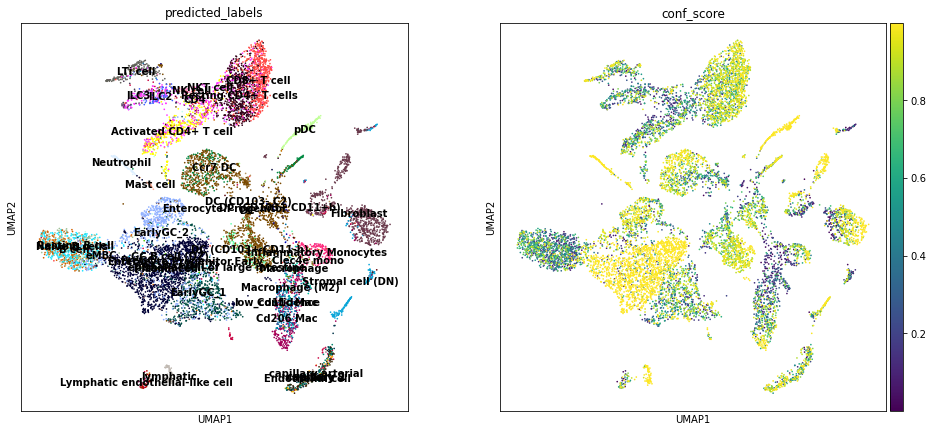

In [23]:
with plt.rc_context({'figure.figsize': (7, 7)}):
    ## Exclude low abundance predictions (if a label is given to less than 10 cells)
    low_ab_predictions = n_cells.index[n_cells < 10]
    adata.obs['predicted_labels'] = adata.obs['predicted_labels'].astype("str")
    adata.obs.loc[adata.obs['predicted_labels'].isin(low_ab_predictions), 'predicted_labels'] = 'low_confidence'
    sc.pl.umap(adata, color=['predicted_labels', 'conf_score'], legend_loc='on data')

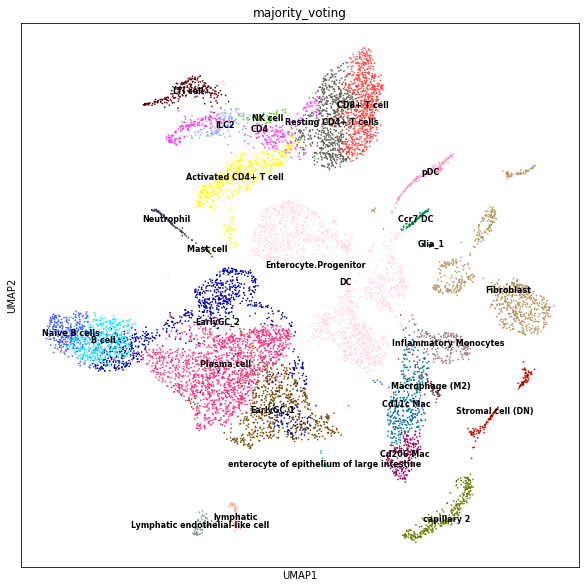

In [24]:
with plt.rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(adata, color=['majority_voting'], legend_loc='on data',legend_fontsize=8)

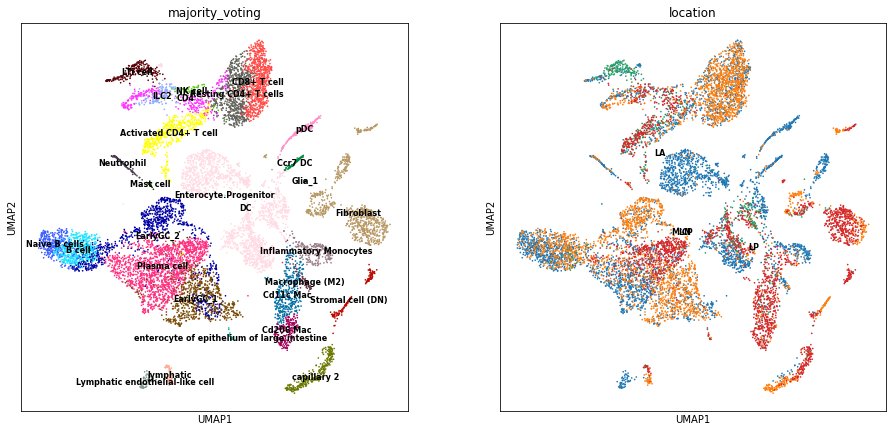

In [25]:
with plt.rc_context({'figure.figsize': (7, 7)}):
    sc.pl.umap(adata, color=['majority_voting','location'], legend_loc='on data',legend_fontsize=8)

The confidence score gives us a measure of uncertainty in the predicted annotation

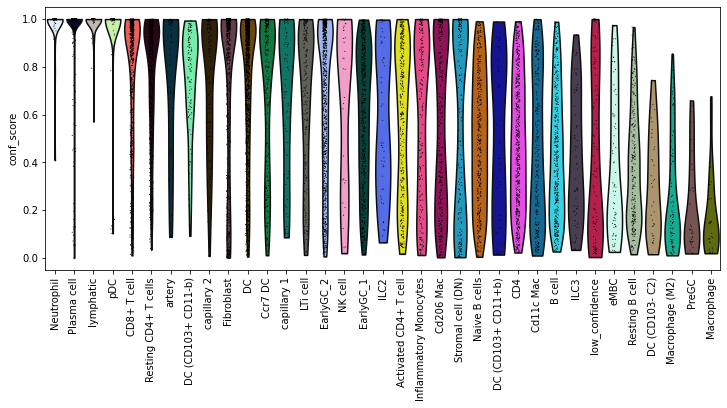

In [26]:
def _plot_sorted_violin(adata, groupby, y_value):
    n_cells_anno = adata.obs[[groupby,y_value]].value_counts(groupby)
    keep_anno = n_cells_anno.index[n_cells_anno > 30]

    mean_sim = adata.obs[[groupby,y_value]].groupby(groupby).mean()
    anno_order = mean_sim.loc[keep_anno].sort_values(y_value, ascending=False).index.tolist()

    adata.var_names_make_unique()
    sc.pl.violin(adata[adata.obs[groupby].isin(keep_anno)], 
                                     y_value, groupby=groupby, rotation=90, 
                                     order=anno_order)

plt.rcParams['figure.figsize'] = [10,5]
_plot_sorted_violin(adata, y_value='conf_score', groupby='predicted_labels')

## Compare annotations

In [27]:
conf_mat = sc.metrics.confusion_matrix('final_annotation', "predicted_labels",  adata.obs, normalize=True)

col_order = conf_mat.idxmax(0).sort_values().index
conf_mat = conf_mat[col_order] ## Sort to have some sort of diagonal

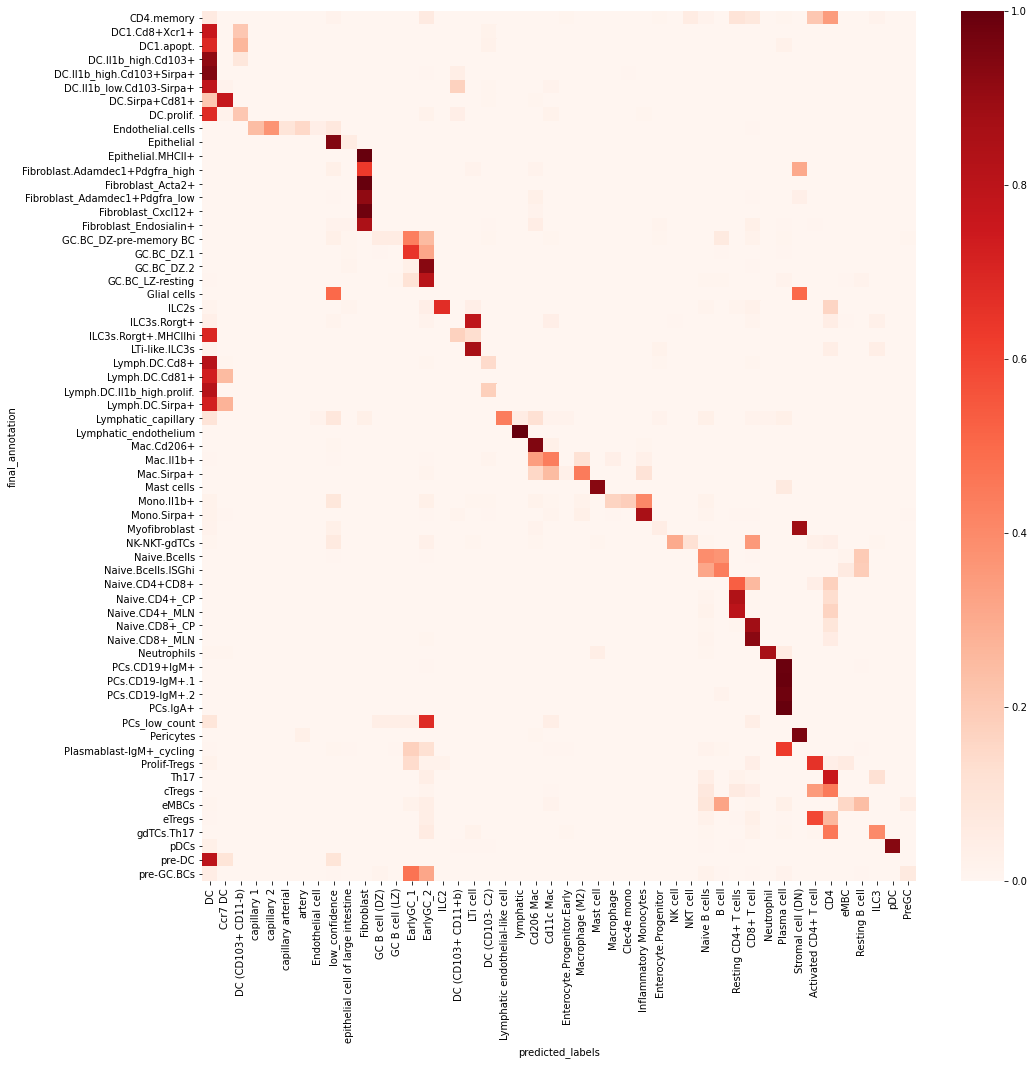

In [28]:
with plt.rc_context({'figure.figsize': (16, 16)}):
    sns.heatmap(conf_mat, xticklabels=True, yticklabels=True, cmap='Reds')

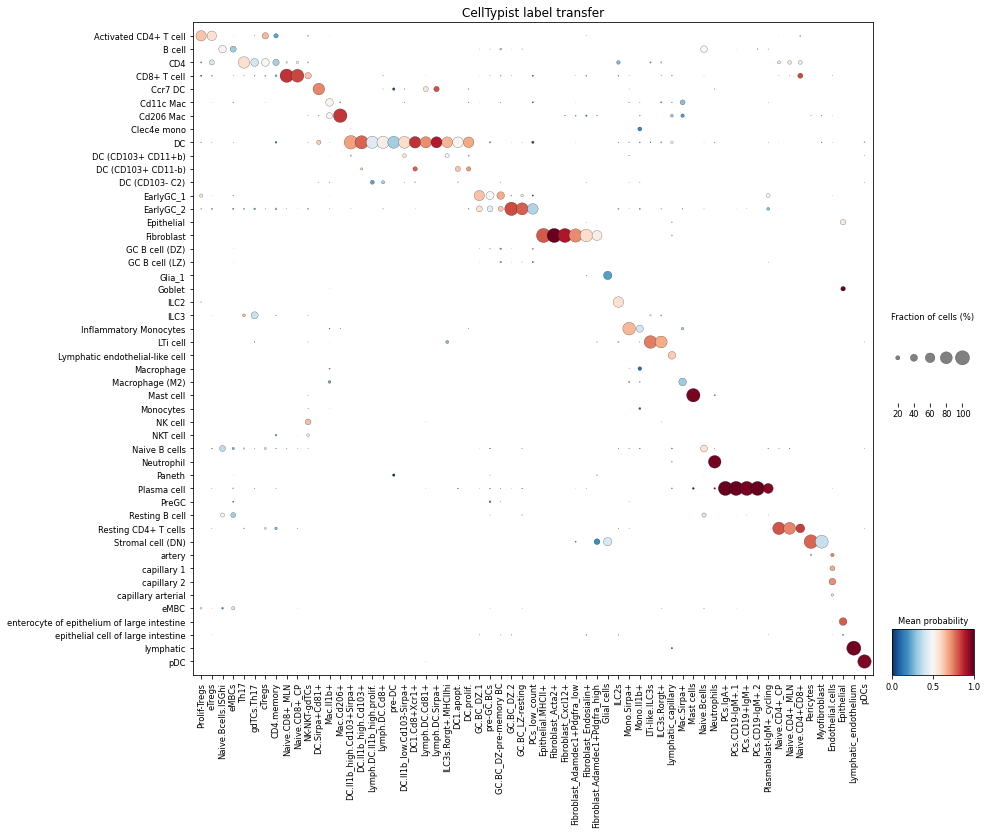

In [29]:
celltypist.dotplot(predictions, 'final_annotation', 'predicted_labels', filter_prediction = 0.05, figsize=(14,12))
#celltypist.dotplot(predictions, 'final_annotation', 'predicted_labels', filter_prediction = 0.05, figsize=(8,8), save='CT_predictions_vs_manual.pdf')

In [30]:
sc.settings.set_figure_params(dpi=80, facecolor='white', color_map='OrRd')

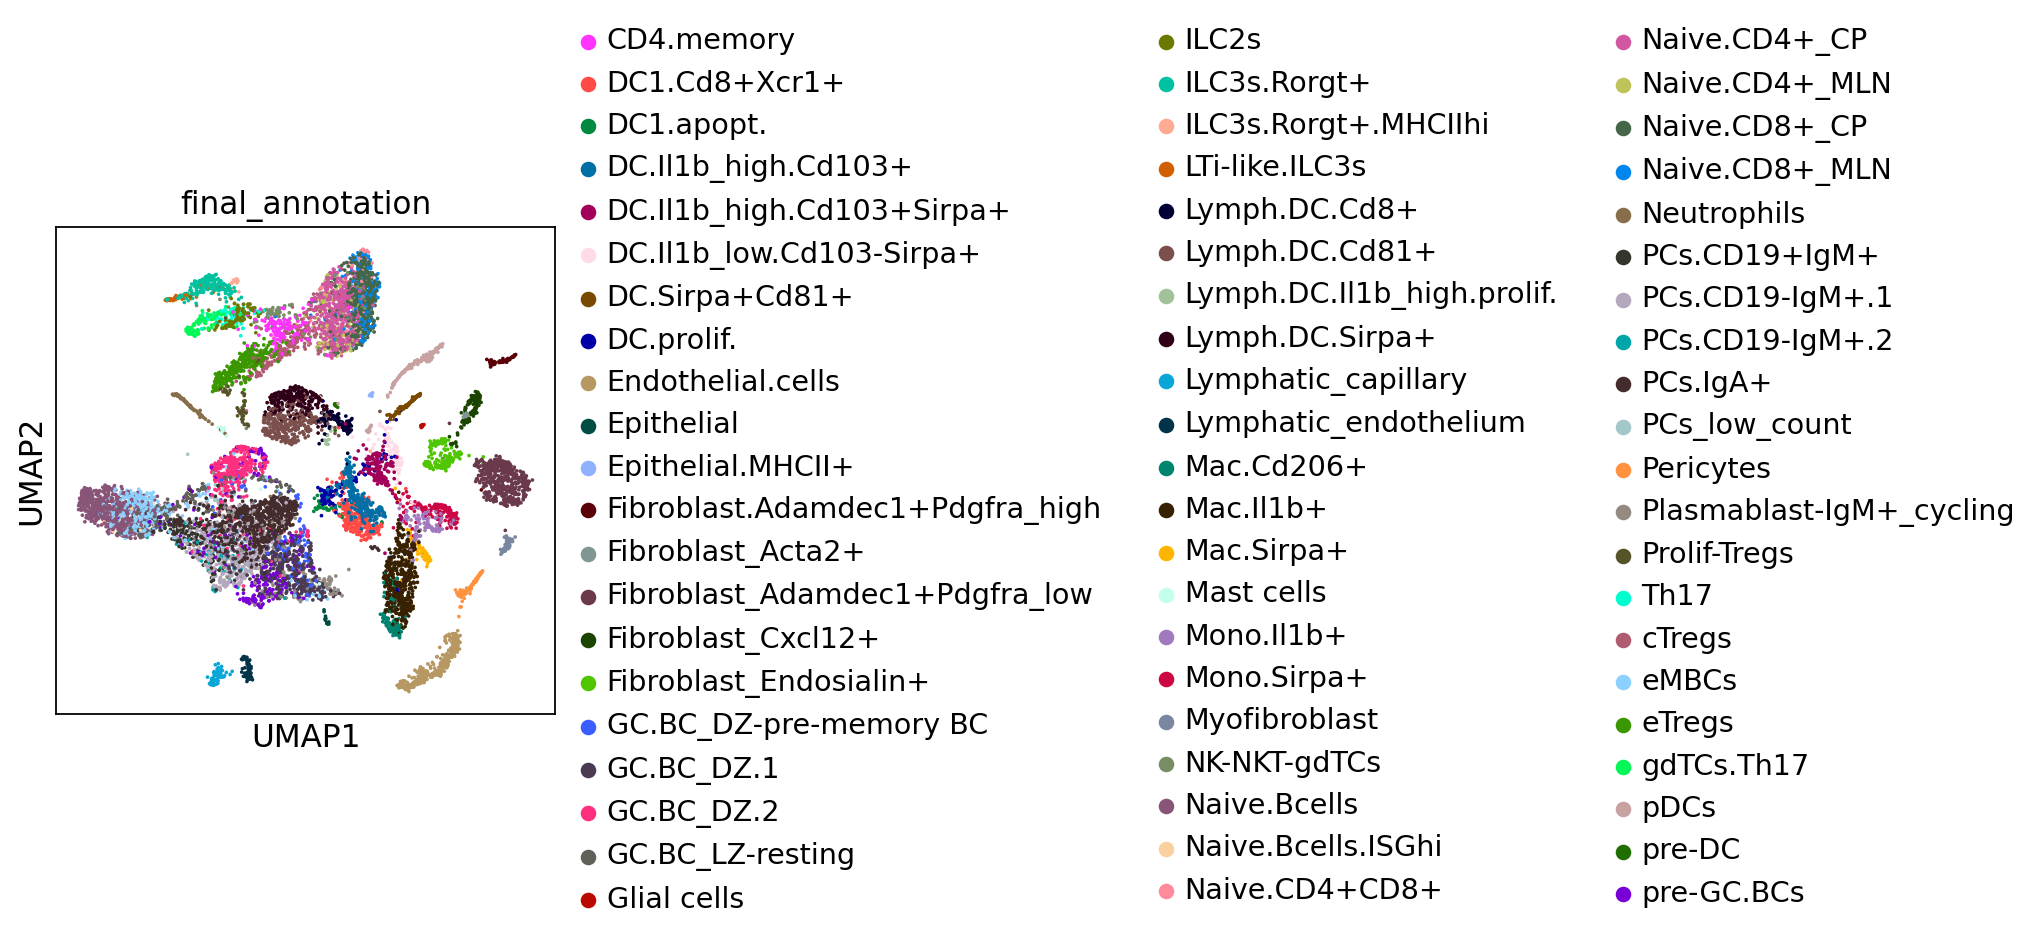

In [31]:
sc.pl.umap(adata, color="final_annotation")

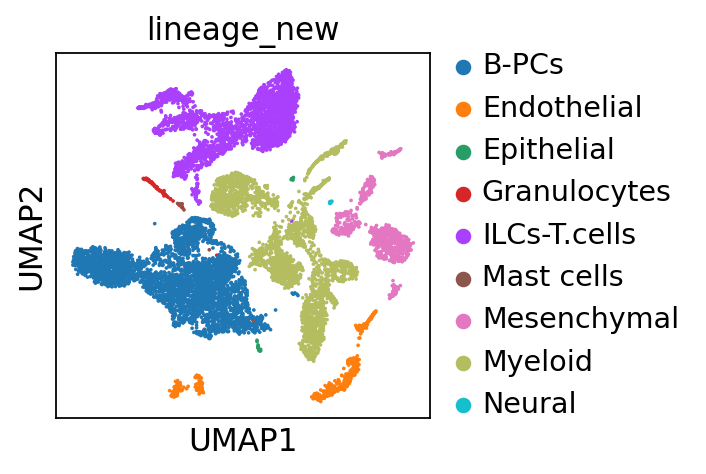

In [32]:
with mpl.rc_context({'figure.figsize': (3, 3)}):
    sc.pl.umap(adata, color=['lineage_new'])

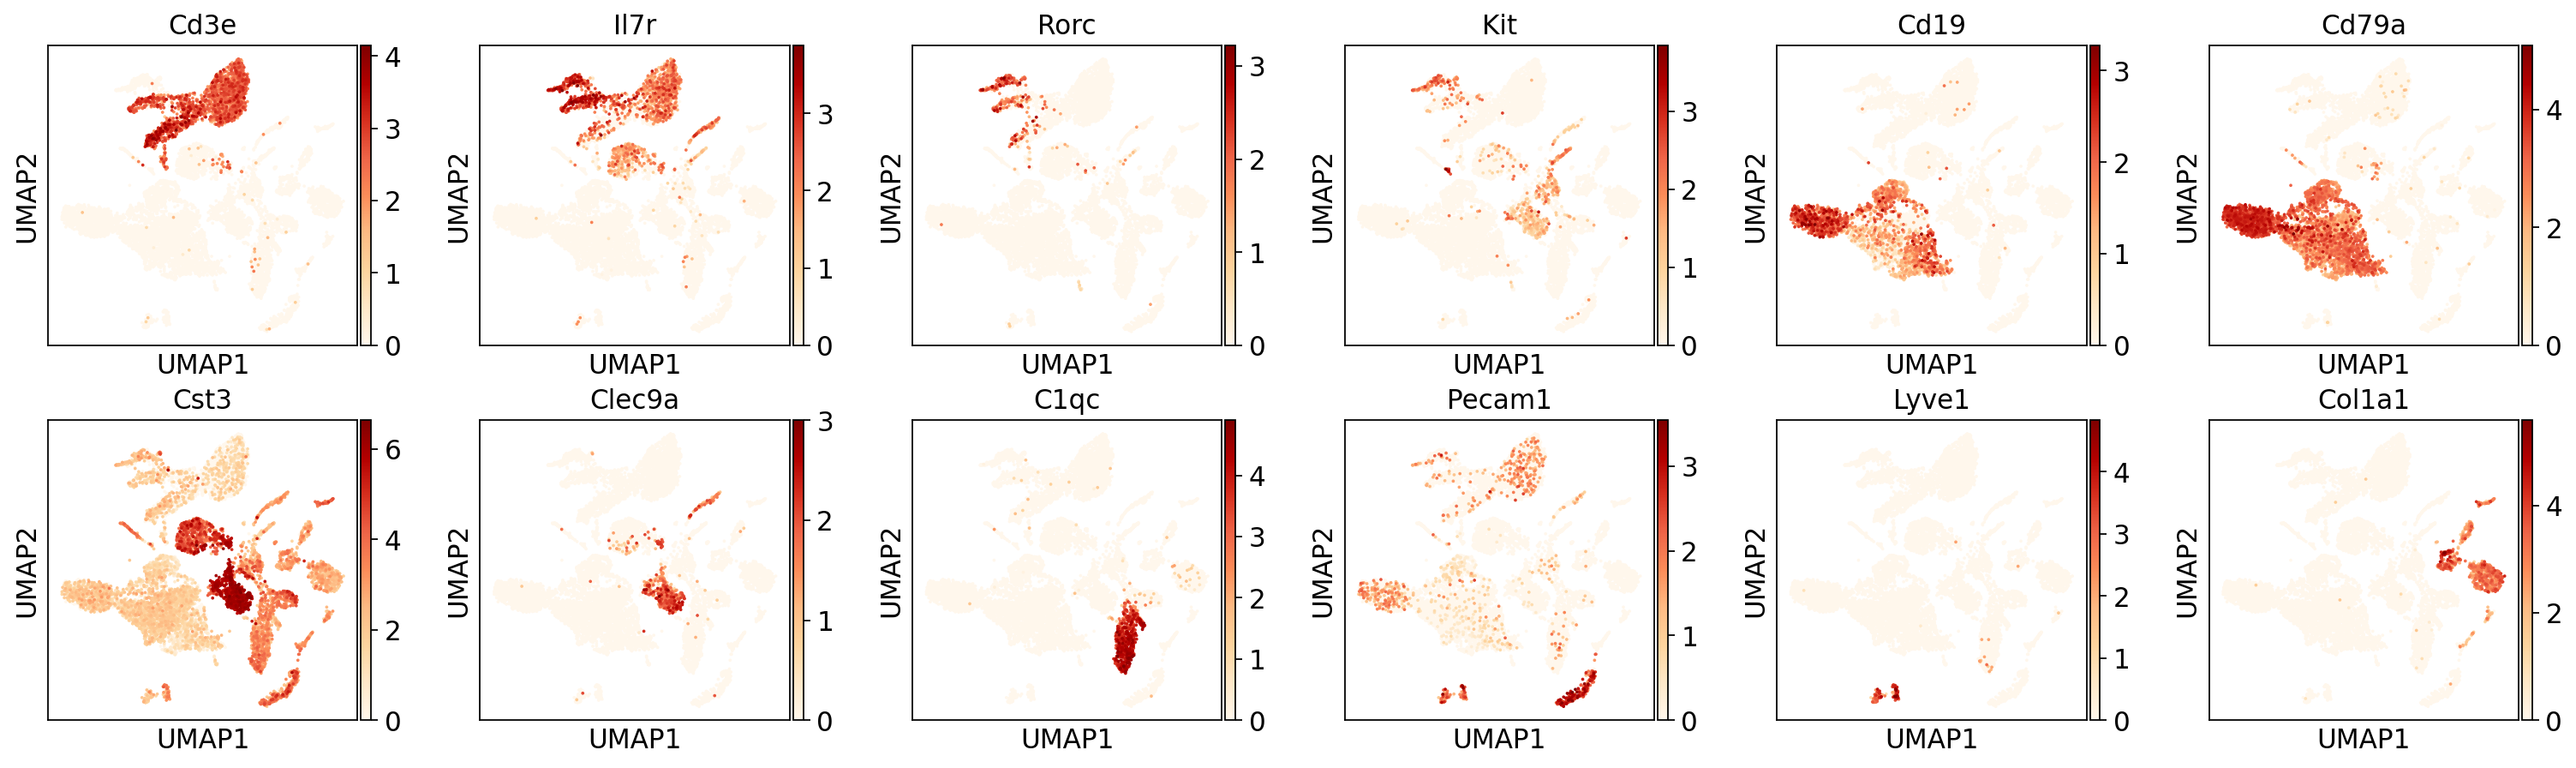

In [33]:
with mpl.rc_context({'figure.figsize': (3, 3)}):
    sc.pl.umap(adata, color = ['Cd3e','Il7r','Rorc','Kit','Cd19','Cd79a','Cst3',"Clec9a",'C1qc', 'Pecam1','Lyve1', 'Col1a1'], 
    legend_fontsize=10, legend_fontoutline=1,ncols=6)

In [34]:
#output a table for Sankey_plot
adata.obs[['final_annotation', 'majority_voting']].to_csv("CTnew_vsFinalManualAnnot_goodLabels.csv")

In [35]:
adata.write('/nfs/team205/rb29/mice_gutTCRtg_project/data/h5ad_objects/mice-gut.TCRtg/latest/mice4samples_Celltypist_afterQC.h5ad')

---